In [1]:
pip install pandas scikit-learn


In [2]:
import pandas as pd

data = {
    'title': [
        'Harry Potter and the Sorcerer\'s Stone',
        'The Hobbit',
        'The Da Vinci Code',
        'Angels & Demons',
        'Harry Potter and the Chamber of Secrets',
        'The Lord of the Rings'
    ],
    'author': [
        'J.K. Rowling', 'J.R.R. Tolkien', 'Dan Brown',
        'Dan Brown', 'J.K. Rowling', 'J.R.R. Tolkien'
    ],
    'genre': [
        'Fantasy', 'Fantasy', 'Thriller',
        'Thriller', 'Fantasy', 'Fantasy'
    ]
}

df = pd.DataFrame(data)


In [3]:
df['combined'] = df['title'] + ' ' + df['author'] + ' ' + df['genre']


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])


cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [5]:

indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def recommend_books(title, num=3):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num+1]
    book_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[book_indices]


print("Recommended books:")
print(recommend_books('Harry Potter and the Sorcerer\'s Stone'))


Recommended books:
4    Harry Potter and the Chamber of Secrets
1                                 The Hobbit
5                      The Lord of the Rings
Name: title, dtype: object


/tmp/ipython-input-6-2535304874.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='author', order=df['author'].value_counts().index, palette='viridis')


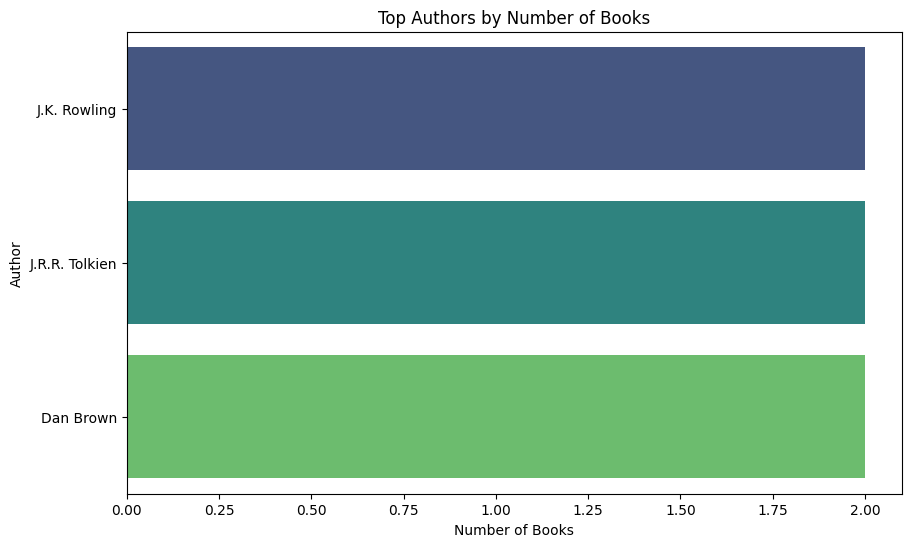

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='author', order=df['author'].value_counts().index, palette='viridis')
plt.title("Top Authors by Number of Books")
plt.xlabel("Number of Books")
plt.ylabel("Author")
plt.show()


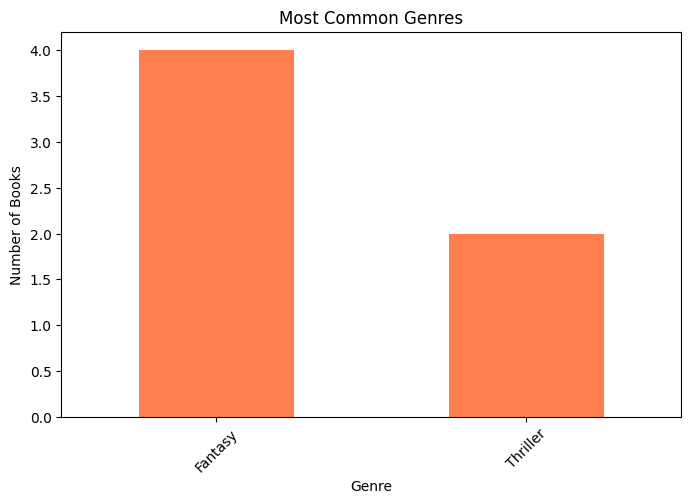

In [7]:
plt.figure(figsize=(8, 5))
df['genre'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.show()


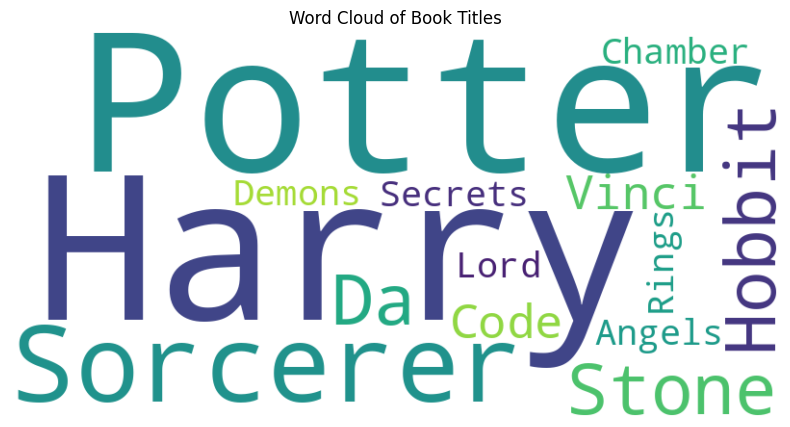

In [9]:
from wordcloud import WordCloud

text = ' '.join(df['title'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Book Titles")
plt.show()


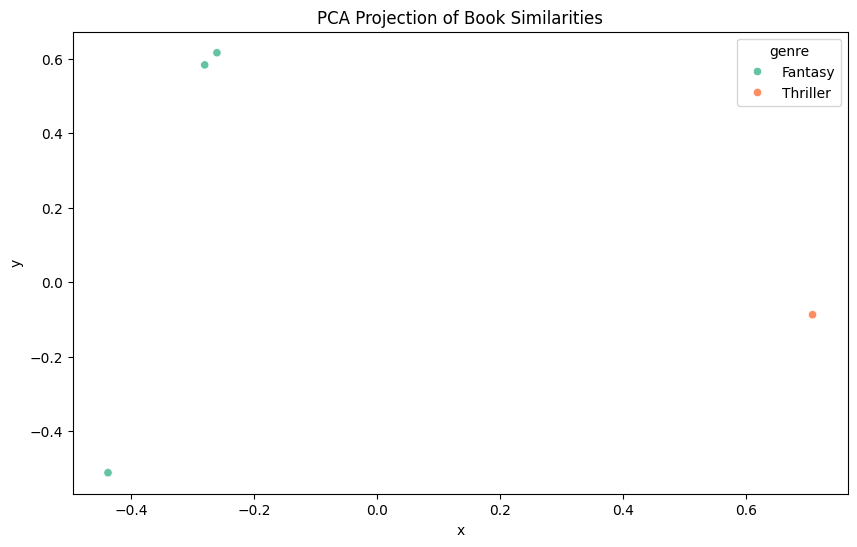

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_matrix.toarray())

df['x'] = reduced[:, 0]
df['y'] = reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='y', hue='genre', palette='Set2')
plt.title("PCA Projection of Book Similarities")
plt.show()
